# Part 2 - exploratory data analysis (EDA), visualization, and feature selection

In [1]:
import pandas as pd
import numpy as np

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()      
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('pt2_df.csv')

In [3]:
# delete non-adjusted salary
df.drop('salary', axis=1, inplace=True)

In [4]:
df.head()

,name,adj_salary,POS,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,Andy Abad,528240.0,1B,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0
1,Jeff Abbott,2301147.0,OF,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0
2,Kurt Abbott,11970434.0,SS,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0
3,Reggie Abercrombie,528240.0,OF,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0
4,Brent Abernathy,926963.0,2B,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2498 non-null   object 
 1   adj_salary  2498 non-null   float64
 2   POS         2498 non-null   object 
 3   GS          2498 non-null   float64
 4   InnOuts     2498 non-null   float64
 5   PO          2498 non-null   float64
 6   A           2498 non-null   float64
 7   E           2498 non-null   float64
 8   DP          2498 non-null   float64
 9   G           2498 non-null   int64  
 10  AB          2498 non-null   int64  
 11  R           2498 non-null   int64  
 12  H           2498 non-null   int64  
 13  2B          2498 non-null   int64  
 14  3B          2498 non-null   int64  
 15  HR          2498 non-null   int64  
 16  RBI         2498 non-null   float64
 17  SB          2498 non-null   float64
 18  CS          2498 non-null   float64
 19  BB          2498 non-null  

In [6]:
df.POS = df.POS.astype('category')

## Exploratory data analysis

In [7]:
df.shape

(2498, 26)

In [8]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
adj_salary,2498.0,2.769253e+07,5.127906e+07,370552.0,1154415.75,5616716.5,29408390.75,600981105.0
GS,2498.0,4.644050e+02,5.080090e+02,0.0,79.00,266.0,698.25,2810.0
InnOuts,2498.0,1.243610e+04,1.336880e+04,0.0,2216.50,7301.5,18761.00,73559.0
PO,2498.0,1.522538e+03,2.281899e+03,0.0,224.00,713.0,1925.25,18985.0
A,2498.0,5.321110e+02,9.885890e+02,0.0,22.00,99.5,511.75,8050.0
E,2498.0,3.482400e+01,4.357400e+01,0.0,6.00,18.0,47.00,296.0
DP,2498.0,1.394480e+02,2.624520e+02,0.0,5.00,25.0,136.00,2028.0
G,2498.0,6.056410e+02,5.686140e+02,1.0,154.00,417.0,911.00,2986.0
AB,2498.0,1.923114e+03,2.071143e+03,0.0,353.50,1131.5,2821.75,11195.0
R,2498.0,2.618230e+02,3.160880e+02,0.0,41.25,138.0,355.00,2227.0


<AxesSubplot:>

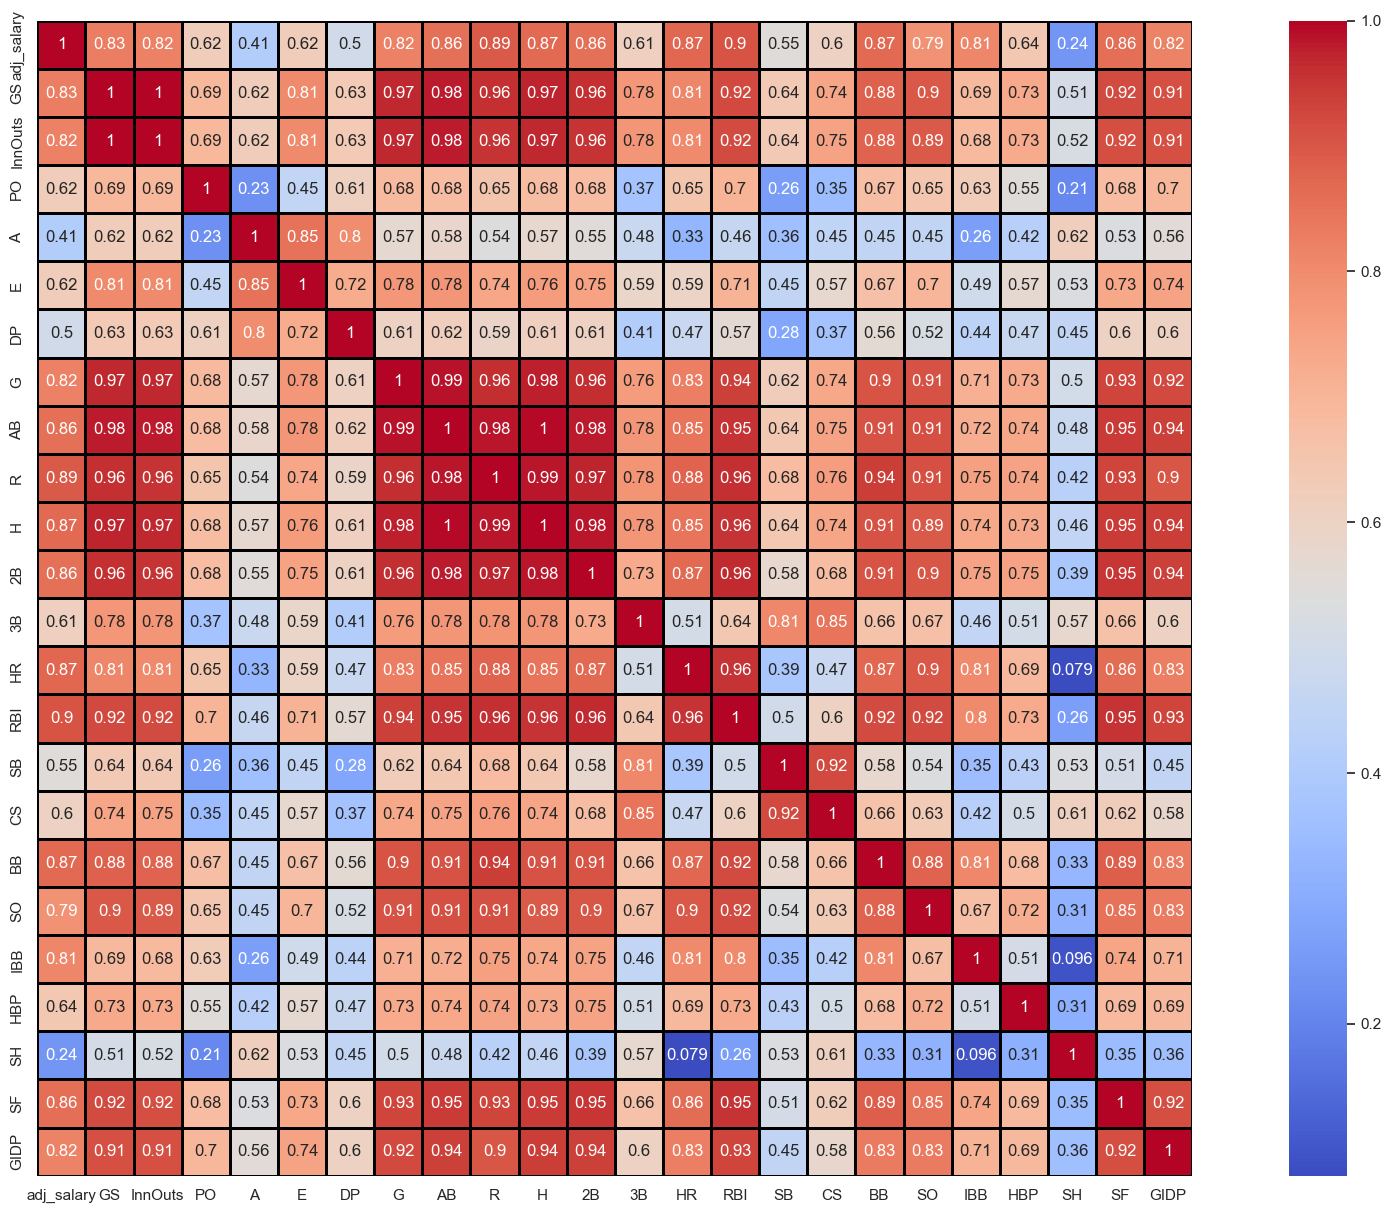

In [9]:
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(25, 15)) 
sns.heatmap(corrmatrix, annot=True, square=True, cmap='coolwarm', linecolor='black', linewidths=1)

- Strong correlation is present among many variables and more importantly, with the target variable (adj_salary)
- There are clear indications of collinearity among some variables
- Per the descriptive statistics many variables in the 25th percentile, and in some cases the 50th, are low numbers
    - It is unlikely these will have normal distributions

## Feature Engineering
- With multicollinearity present among many independent variables, new features will be created to combine the stats
- Only a few popular analytical stats will be added

In [10]:
# plate appearances
df['PA'] = df['AB'] + df['BB'] + df["HBP"] + df["SF"] + df["SH"]

# on-base %
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF'])

# slugging %
df['SLG'] = (df['H'] + df['2B'] + (2*df['3B']) + (3*df['HR'])) / df['AB']

df = df.replace(np.nan, 0)

## Visualizations

<AxesSubplot:>

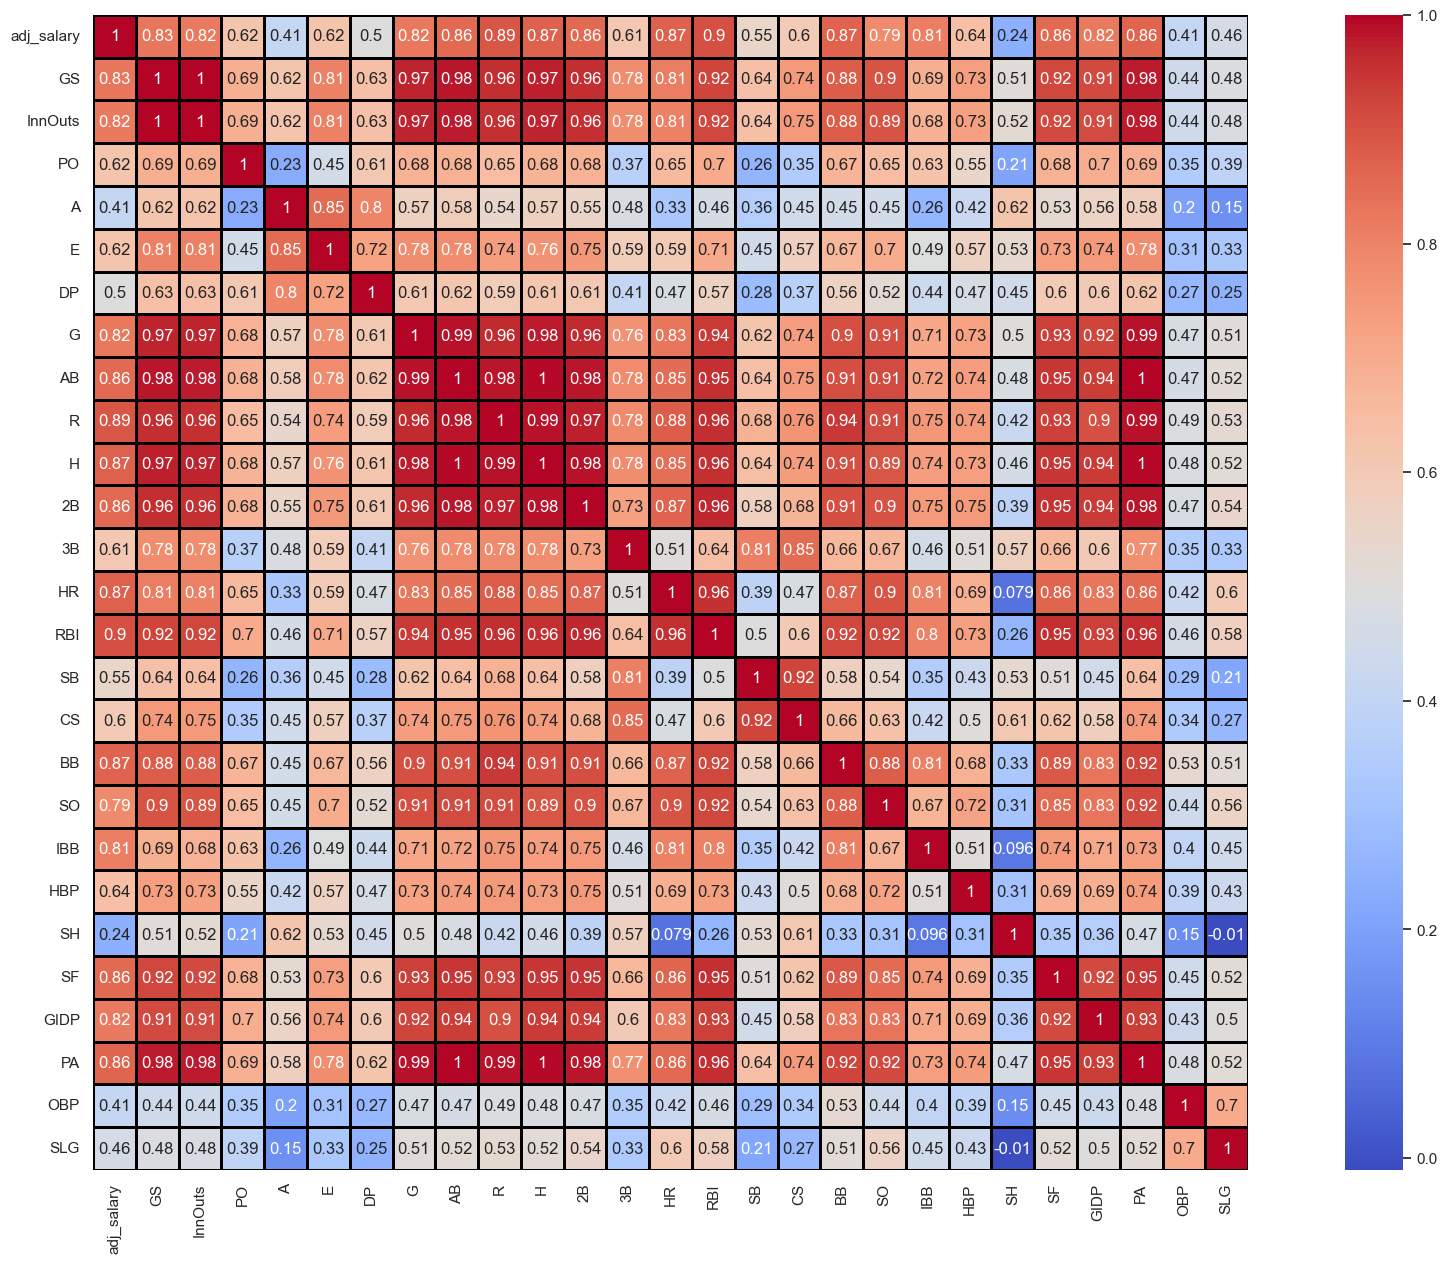

In [11]:
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(25, 15)) 
sns.heatmap(corrmatrix, annot=True, square=True, cmap='coolwarm', linecolor='black', linewidths=1)

In [12]:
df.head()

,name,adj_salary,POS,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG
0,Andy Abad,528240.0,1B,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,0.240000,0.095238
1,Jeff Abbott,2301147.0,OF,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0,649.0,0.307453,0.416107
2,Kurt Abbott,11970434.0,SS,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0,2227.0,0.305077,0.422701
3,Reggie Abercrombie,528240.0,OF,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0,421.0,0.274038,0.354922
4,Brent Abernathy,926963.0,2B,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0,955.0,0.297125,0.324885


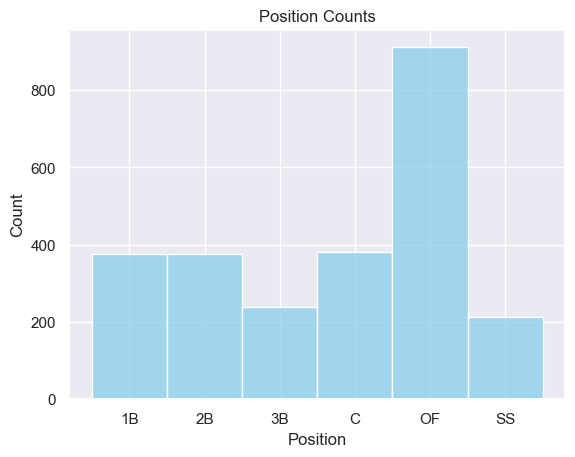

In [13]:
plt.title('Position Counts')
plt.xlabel('Position')
plt.ylabel('Count')
_ = sns.histplot(df.POS, color='skyblue')

- I expected to see a higher OF count because it covers 3 positions, but not a lower count for 3B & SS

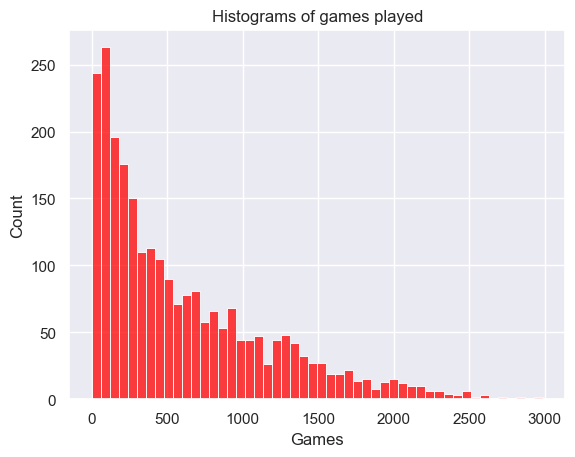

In [14]:
plt.title('Histograms of games played')
plt.xlabel('Games')
plt.ylabel('Count')
_ = sns.histplot(df.G, color='red', bins=50)

Text(0.5, 12.44444444444443, 'Games')

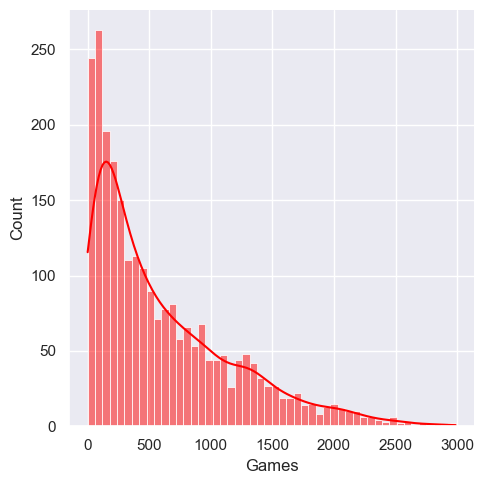

In [15]:
_ = sns.displot(data=df['G'], kde=True, color='red', bins=50)
plt.xlabel('Games')

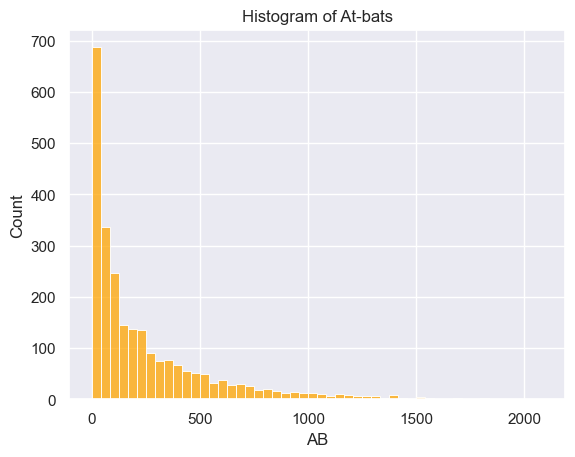

In [16]:
plt.title('Histogram of At-bats')
plt.xlabel('AB')
plt.ylabel('Count')
_ = sns.histplot(df.RBI, color='orange', bins=50)

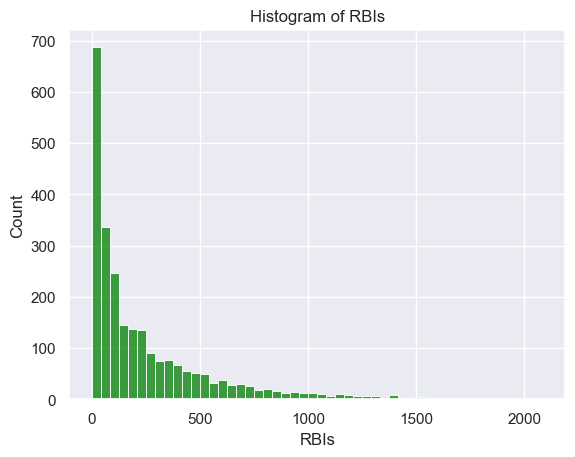

In [17]:
plt.title('Histogram of RBIs')
plt.xlabel('RBIs')
plt.ylabel('Count')
_ = sns.histplot(df.RBI, color='green', bins=50)

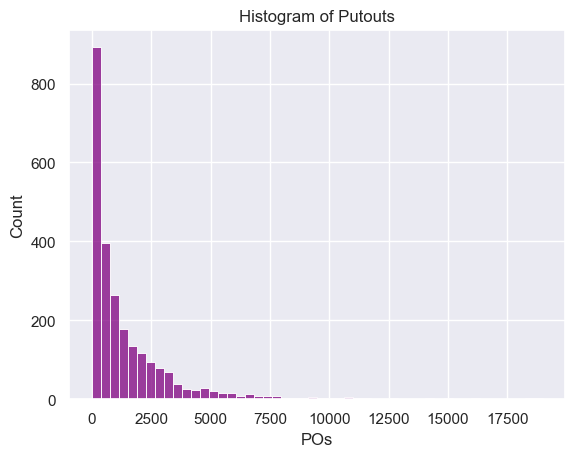

In [18]:
plt.title('Histogram of Putouts')
plt.xlabel('POs')
plt.ylabel('Count')
_ = sns.histplot(df.PO, color='purple', bins=50)

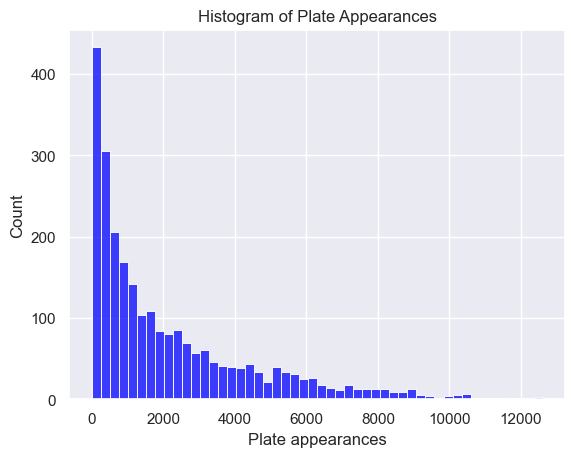

In [19]:
plt.title('Histogram of Plate Appearances')
plt.xlabel('Plate appearances')
plt.ylabel('Count')
_ = sns.histplot(df.PA, color='blue', bins=50)

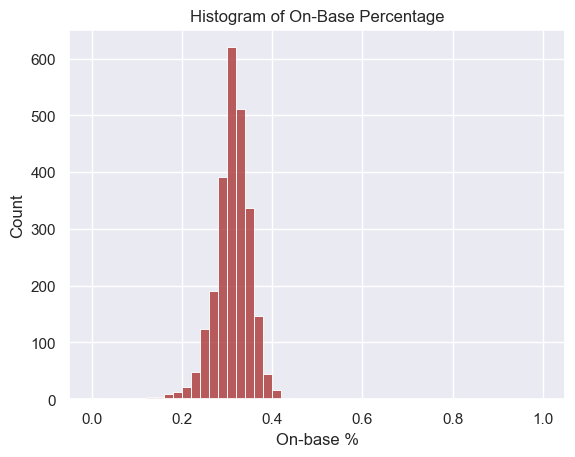

In [20]:
plt.title('Histogram of On-Base Percentage')
plt.xlabel('On-base %')
plt.ylabel('Count')
_ = sns.histplot(df.OBP, color='brown', bins=50)

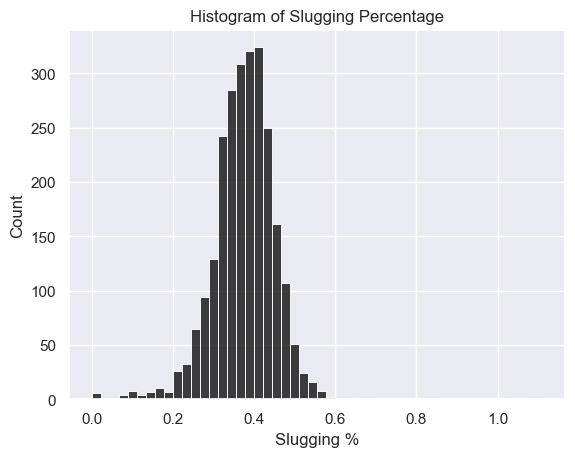

In [21]:
plt.title('Histogram of Slugging Percentage')
plt.xlabel('Slugging %')
plt.ylabel('Count')
_ = sns.histplot(df.SLG, color='black', bins=50)

- A sampling of offensive and defensive statistics all show a count concentration toward the low end
- Two calculated features (OBP, SLG) have a more normal distribution

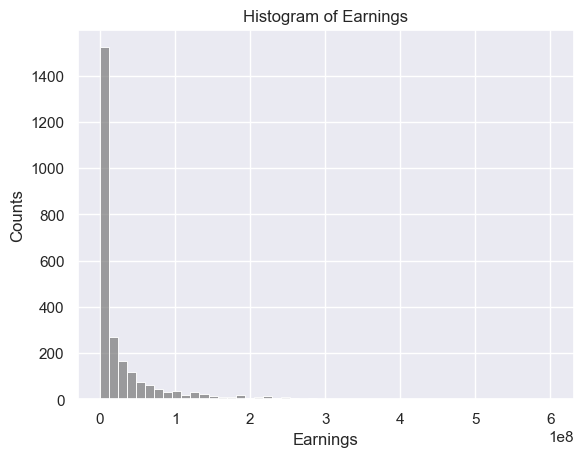

In [22]:
plt.title('Histogram of Earnings')
plt.xlabel('Earnings')
plt.ylabel('Counts')
_ = sns.histplot(df.adj_salary, color='grey', bins=50)

In [23]:
df.adj_salary.describe()

count    2.498000e+03
mean     2.769253e+07
std      5.127906e+07
min      3.705520e+05
25%      1.154416e+06
50%      5.616716e+06
75%      2.940839e+07
max      6.009811e+08
Name: adj_salary, dtype: float64

- Average career earnings is 28M and one player made over 600M

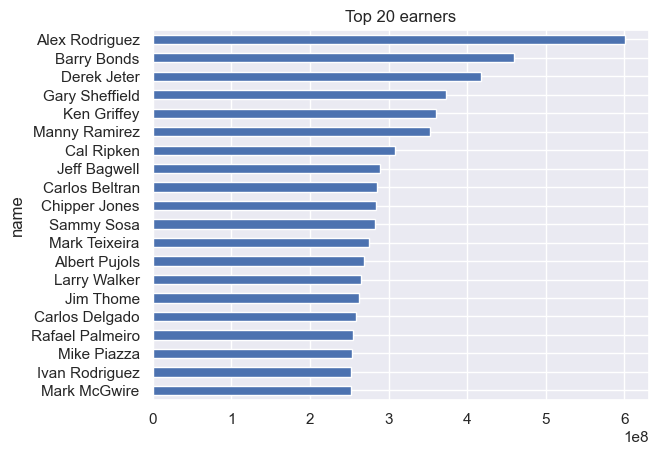

In [24]:
plot_df = df.copy()
plot_df.set_index("name",drop=True,inplace=True)
_ = plot_df['adj_salary'].sort_values(ascending=True)[-20:].plot.barh(title='Top 20 earners')

- The top earners are all well-known names. As you can see the lowest on this list still made over 200M in their career

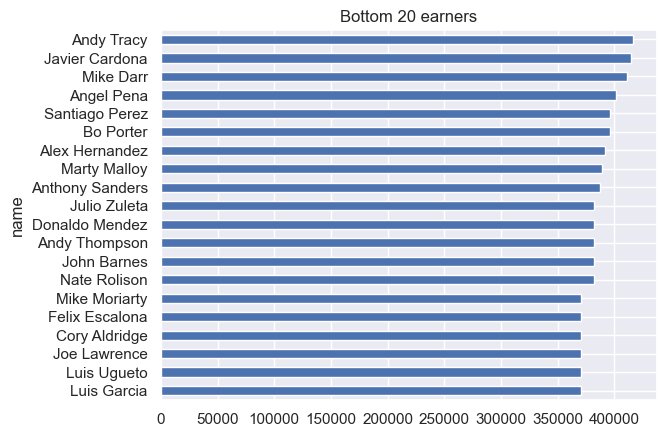

In [25]:
plot_df = df.copy()
plot_df.set_index("name",drop=True,inplace=True)
_ = plot_df['adj_salary'].sort_values(ascending=True)[:20].plot.barh(title='Bottom 20 earners')

- I don't recognize any names of the low earners. Note the maximum on this plot is just 400K. When the x-axis is set to 600M, the bars are not visible

Text(0, 0.5, 'Earnings (100M)')

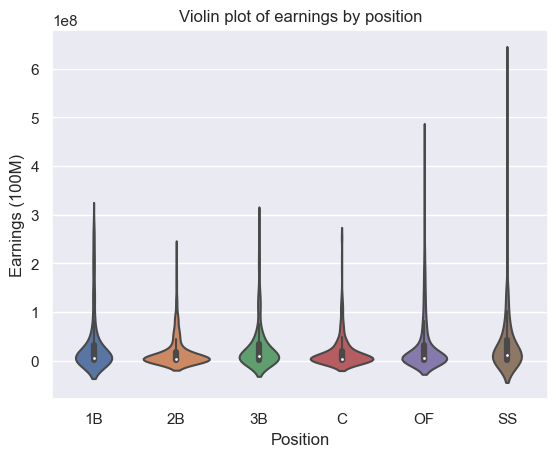

In [26]:
positions = df.POS.value_counts().index
pos_data = df[df.POS.isin(positions)]

sns.violinplot(data=pos_data, x='POS', y='adj_salary')

plt.title('Violin plot of earnings by position')
plt.xlabel('Position')
plt.ylabel('Earnings (100M)')

<AxesSubplot:title={'center':'Average total earnings per position (1985-2016)'}, xlabel='POS'>

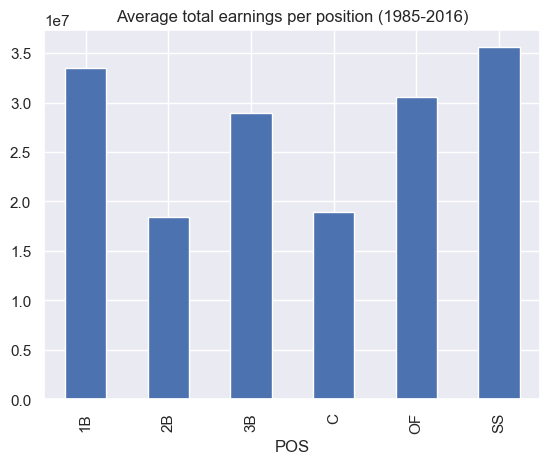

In [27]:
pos_avg = df.groupby(['POS'])
pos_avg = pos_avg.mean().reset_index()
pos_avg.set_index('POS',drop=True,inplace=True)

pos_avg['adj_salary'].plot.bar(title='Average total earnings per position (1985-2016)')

- On average, 2B and C positions earn less in their careers

Text(0, 0.5, 'Career earnings')

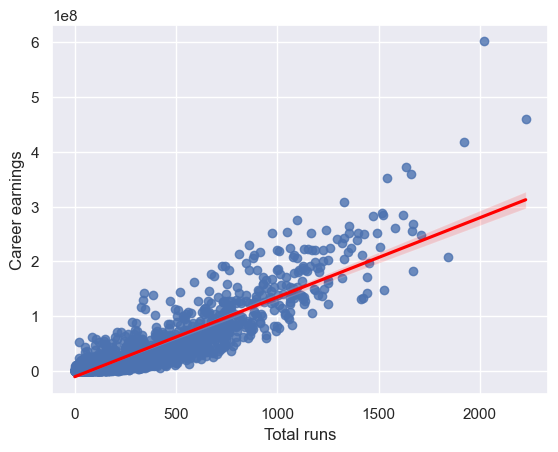

In [26]:
sns.regplot(df.R, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Total runs')
plt.ylabel('Career earnings')

Text(0, 0.5, 'Career Earnings')

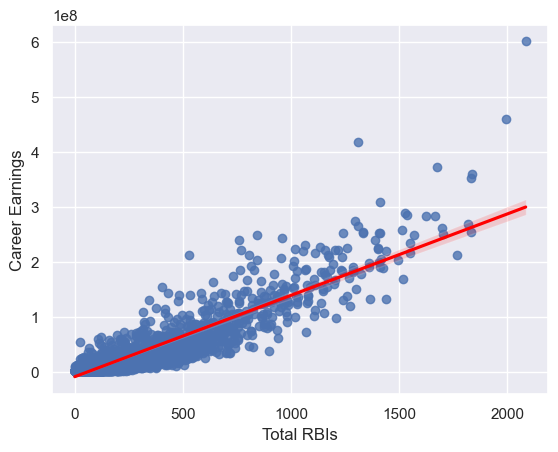

In [29]:
sns.regplot(df.RBI, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Total RBIs')
plt.ylabel('Career Earnings')

Text(0, 0.5, 'Career earnings')

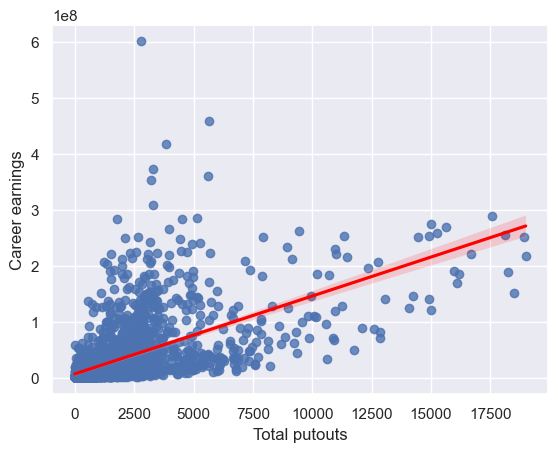

In [30]:
sns.regplot(df.PO, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Total putouts')
plt.ylabel('Career earnings')

- Regression plots various offensive & defensive stats show positive linear relationships
- The putout regression plot has a higher number of data points away from the regression line

Text(0, 0.5, 'Career earnings')

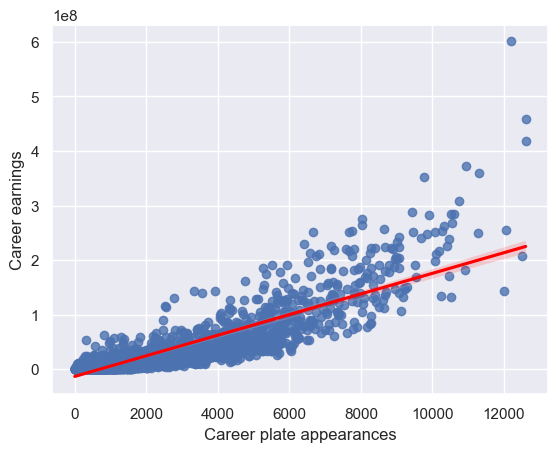

In [31]:
sns.regplot(df.PA, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Career plate appearances')
plt.ylabel('Career earnings')

Text(0, 0.5, 'Career earnings')

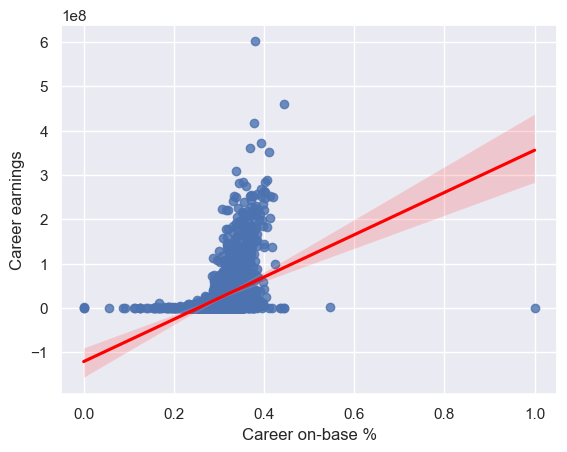

In [32]:
sns.regplot(df.OBP, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Career on-base %')
plt.ylabel('Career earnings')

Text(0, 0.5, 'Career earnings')

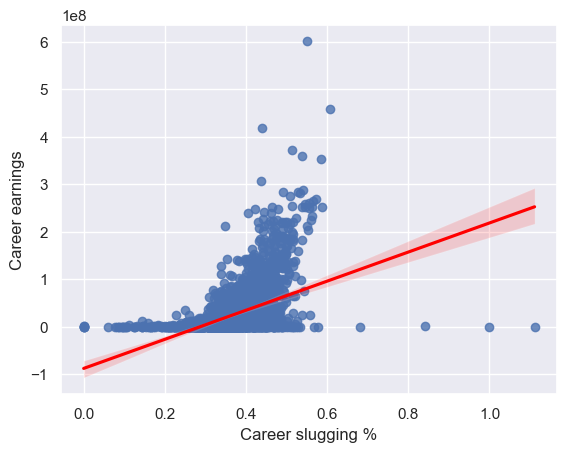

In [33]:
sns.regplot(df.SLG, df.adj_salary, line_kws={'color': 'red'})

plt.xlabel('Career slugging %')
plt.ylabel('Career earnings')

- Correlation with earnings and created features is not as strong as they were with standard stats

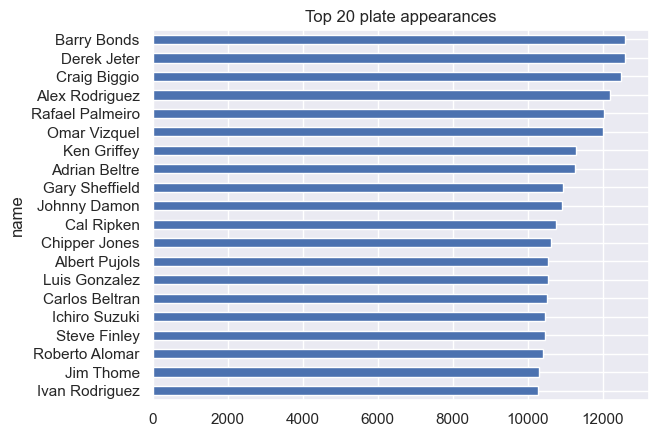

In [34]:
plot_df = df.copy()
plot_df.set_index("name",drop=True,inplace=True)
_ = plot_df['PA'].sort_values(ascending=True)[-20:].plot.barh(title='Top 20 plate appearances')

- Many of the top earners have a high number of plate appearances

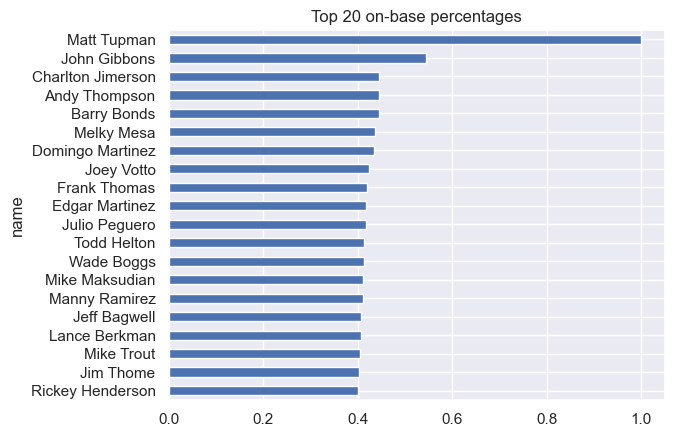

In [35]:
plot_df = df.copy()
plot_df.set_index("name",drop=True,inplace=True)
_ = plot_df['OBP'].sort_values(ascending=True)[-20:].plot.barh(title='Top 20 on-base percentages')

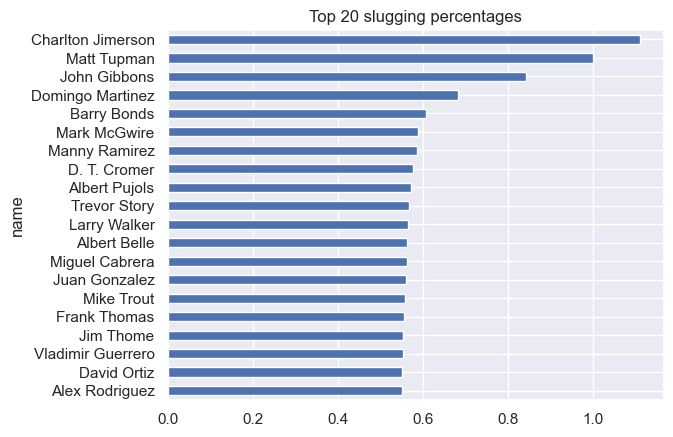

In [36]:
plot_df = df.copy()
plot_df.set_index("name",drop=True,inplace=True)
_ = plot_df['SLG'].sort_values(ascending=True)[-20:].plot.barh(title='Top 20 slugging percentages')

- Players with the highest OBP & SLG include some who are not among high earners

In [37]:
df.head()

,name,adj_salary,POS,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG
0,Andy Abad,528240.0,1B,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,0.240000,0.095238
1,Jeff Abbott,2301147.0,OF,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0,649.0,0.307453,0.416107
2,Kurt Abbott,11970434.0,SS,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0,2227.0,0.305077,0.422701
3,Reggie Abercrombie,528240.0,OF,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0,421.0,0.274038,0.354922
4,Brent Abernathy,926963.0,2B,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0,955.0,0.297125,0.324885


In [30]:
df.corr()['adj_salary'].sort_values(ascending=True)

SH            0.241073
A             0.410338
OBP           0.410766
SLG           0.460045
DP            0.497599
SB            0.547080
CS            0.600785
3B            0.611469
PO            0.619986
E             0.621568
HBP           0.640614
SO            0.786494
IBB           0.809449
GIDP          0.819427
InnOuts       0.821144
G             0.823344
GS            0.828217
AB            0.855354
2B            0.855612
SF            0.856040
PA            0.863456
BB            0.869479
H             0.870108
HR            0.871872
R             0.893067
RBI           0.903844
adj_salary    1.000000
Name: adj_salary, dtype: float64

Does position correlate with 

In [33]:
offense =  ['POS', 'R', 'H', 'RBI', 'SB', '2B']
defense =  ['adj_salary', 'POS', 'PO', 'A', 'E', 'DP']

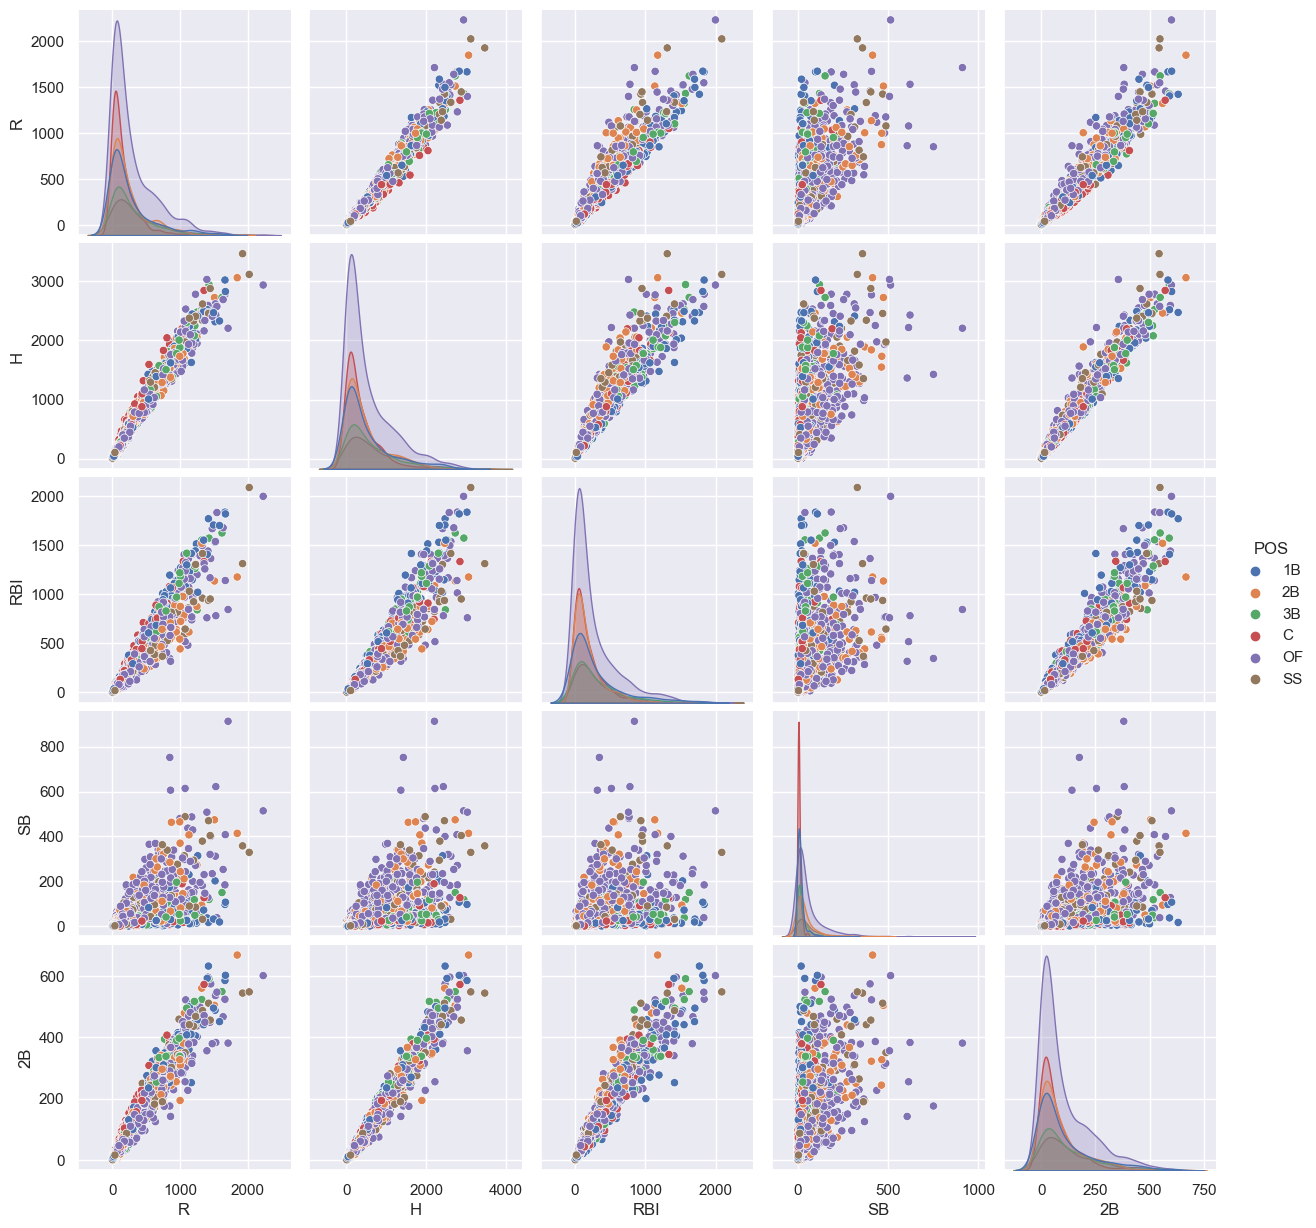

In [34]:
# offensive stats
sns.pairplot(df[offense], hue='POS')

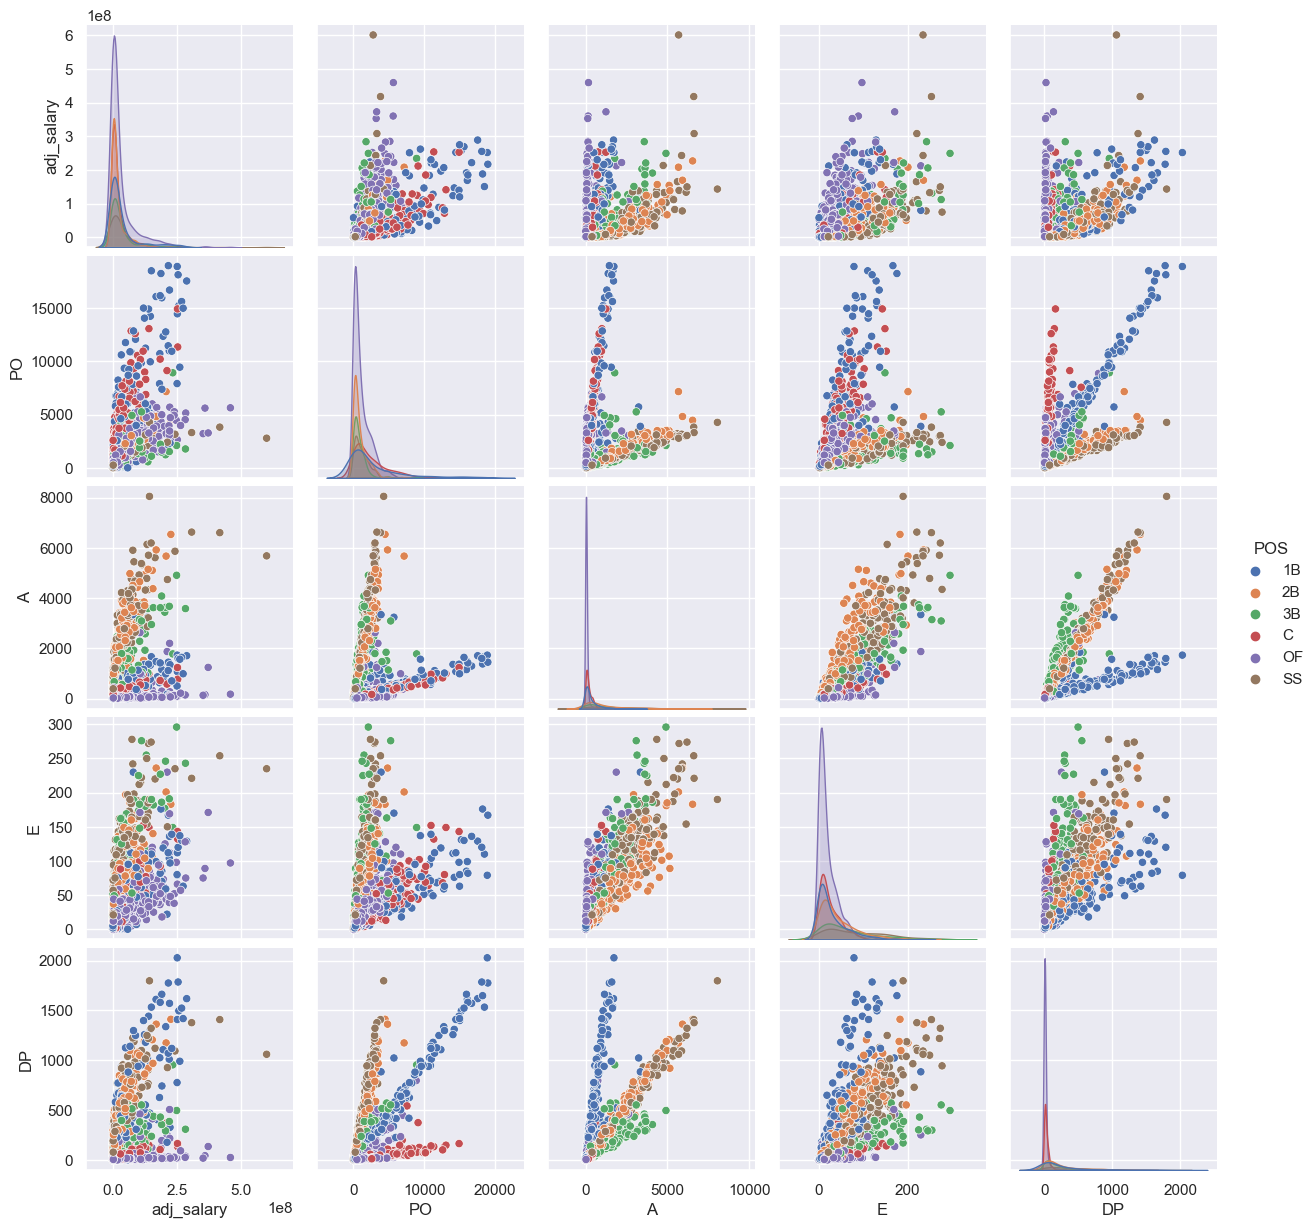

In [40]:
# defensive stats
sns.pairplot(df[defense], hue='POS')

## Pairplot analysis
- Pairplot of offensive stats show strong correlation with target variable indicate multicollinearity is still present in the standard batting dataset
- Pairplot of defensive stats indicate the position has an impact 

## Feature selection

- The effect of different positions was apparent in the pairplot so dummy variables will be created for them

In [41]:
df.head()

,name,adj_salary,POS,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG
0,Andy Abad,528240.0,1B,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,0.240000,0.095238
1,Jeff Abbott,2301147.0,OF,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0,649.0,0.307453,0.416107
2,Kurt Abbott,11970434.0,SS,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0,2227.0,0.305077,0.422701
3,Reggie Abercrombie,528240.0,OF,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0,421.0,0.274038,0.354922
4,Brent Abernathy,926963.0,2B,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0,955.0,0.297125,0.324885


In [42]:
dummies = df.loc[:,'adj_salary':].copy()
dummies = pd.get_dummies(dummies, drop_first=True)

In [43]:
dummies.columns

Index(['adj_salary', 'GS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'PA', 'OBP', 'SLG', 'POS_2B', 'POS_3B', 'POS_C',
       'POS_OF', 'POS_SS'],
      dtype='object')

<AxesSubplot:title={'center':"Pearson's correlation with target variable (adj_salary)"}>

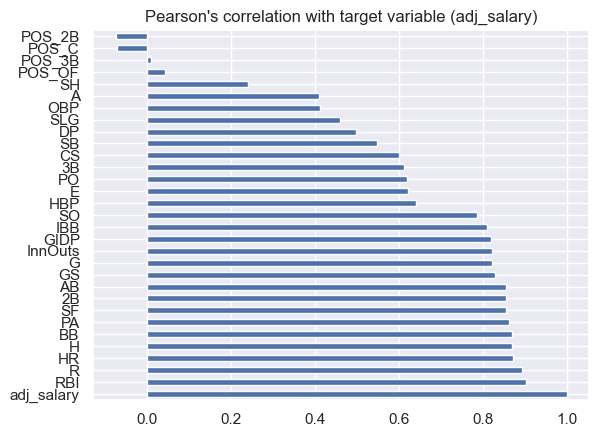

In [44]:
dummies.corr().loc['adj_salary'][:-1].sort_values(ascending=False).plot.barh(title="Pearson's correlation with target variable (adj_salary)")

- The positions don't make a significant difference so they will be thrown out

In [45]:
drops = ['POS_2B', 'POS_3B', 'POS_C', 'POS_OF', 'POS_SS']
fs_df = dummies.drop(drops, axis=1)

- Feature importance will now be quantified using the RandomForestRegressor() 
- A new column with a random number will be added to the dataset

In [46]:
# assigning random number column
the_min = fs_df.H.min()
the_max = fs_df.H.max()
fs_df['random'] = np.random.normal(the_min, the_max, size=fs_df.shape[0])
fs_df.head()

,adj_salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,random
0,528240.0,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,0.240000,0.095238,-2514.474079
1,2301147.0,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0,649.0,0.307453,0.416107,4730.716873
2,11970434.0,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0,2227.0,0.305077,0.422701,366.653842
3,528240.0,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0,421.0,0.274038,0.354922,4068.219939
4,926963.0,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0,955.0,0.297125,0.324885,743.133049


In [47]:
fs_df.loc[:,'GS':].head()

,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP,SLG,random
0,4.0,138.0,37.0,1.0,1.0,3.0,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,25.0,0.240000,0.095238,-2514.474079
1,140.0,3688.0,299.0,2.0,8.0,0.0,233,596,82,157,33,2,18,83.0,6.0,5.0,38,91.0,2.0,3.0,5.0,7.0,12.0,649.0,0.307453,0.416107,4730.716873
2,504.0,13474.0,938.0,1262.0,79.0,275.0,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0,2227.0,0.305077,0.422701,366.653842
3,96.0,2624.0,272.0,7.0,6.0,2.0,180,386,65,86,20,2,9,34.0,18.0,8.0,21,123.0,2.0,7.0,5.0,2.0,3.0,421.0,0.274038,0.354922,4068.219939
4,217.0,5782.0,445.0,590.0,22.0,154.0,232,868,97,212,36,5,8,79.0,21.0,7.0,60,93.0,1.0,7.0,16.0,4.0,15.0,955.0,0.297125,0.324885,743.133049


In [48]:
# Splitting data
X = fs_df.loc[:,'GS':].copy()
y = fs_df.adj_salary.copy()

In [49]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

importance_list = list(zip(X.columns, rf_regressor.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance

[('RBI', 0.5224696440810255),
 ('R', 0.23056872603355988),
 ('H', 0.054555597150265),
 ('PA', 0.037061313208418954),
 ('IBB', 0.023083233512450573),
 ('AB', 0.02259190909344686),
 ('HR', 0.016561245320488107),
 ('BB', 0.010241902773909928),
 ('SO', 0.007672345299276527),
 ('OBP', 0.006956569725766509),
 ('GS', 0.006069931799628013),
 ('G', 0.005063586147742614),
 ('SB', 0.00487526243927809),
 ('HBP', 0.004608440884051064),
 ('GIDP', 0.0044408307074010195),
 ('random', 0.003999769251803546),
 ('PO', 0.003994696916130123),
 ('DP', 0.003967987793956115),
 ('SLG', 0.003965942828861292),
 ('SF', 0.0037773229450709708),
 ('3B', 0.0037534382930105494),
 ('A', 0.003471629043535408),
 ('CS', 0.003430489680313433),
 ('E', 0.003369861288678009),
 ('2B', 0.0032479285557404794),
 ('InnOuts', 0.0031253623803859866),
 ('SH', 0.0030750328458054674)]

- Although there are many features above the 'random' column, I'm going to set the threshold to .02 and drop all columns below that

In [50]:
sorted_importance[:5]

[('RBI', 0.5224696440810255),
 ('R', 0.23056872603355988),
 ('H', 0.054555597150265),
 ('PA', 0.037061313208418954),
 ('IBB', 0.023083233512450573)]

In [51]:
# convert to list of columns
top_ranks = sorted_importance[:5]
top_rank_cols = [s[0].split(',')[0] for s in top_ranks]
top_rank_cols

['RBI', 'R', 'H', 'PA', 'IBB']

In [52]:
top_rank_df = df[top_rank_cols]
top_rank_df['adj_salary'] = y

In [53]:
top_rank_df.head()

,RBI,R,H,PA,IBB,adj_salary
0,0.0,1,2,25.0,0.0,528240.0
1,83.0,82,157,649.0,2.0,2301147.0
2,242.0,273,523,2227.0,11.0,11970434.0
3,34.0,65,86,421.0,2.0,528240.0
4,79.0,97,212,955.0,1.0,926963.0


## Variance inflation factor 
- To quantify multicollinearity, I'll check the variance inflation factor (VIF), which measures the correlation and strength of correlation between the dependent variables in regression models.

In [54]:
# continuous independent variables only
vif_df = top_rank_df.loc[:, :'IBB'].copy()

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
3,PA,191.539110
2,H,187.070335
1,R,68.996839
0,RBI,28.084896
4,IBB,3.831290


## VIF Analysis
- High VIF values are indicative of multicollinearity, which was apparent in the correlation matrix and pair plot (offensive)
- Here, we see the highest values are with at-bats and plate appearances, very similar stats

- Removing the highest VIF value (plate appearances) to reduce overfitting during machine learning phase:

In [55]:
df_final = top_rank_df[['RBI', 'R', 'H', 'IBB', 'adj_salary']]

In [56]:
# final check
df_final.head()

,RBI,R,H,IBB,adj_salary
0,0.0,1,2,0.0,528240.0
1,83.0,82,157,2.0,2301147.0
2,242.0,273,523,11.0,11970434.0
3,34.0,65,86,2.0,528240.0
4,79.0,97,212,1.0,926963.0


In [57]:
df_final.to_csv('pt3_df.csv', index=False)

**END OF PART 2**